In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Set config option to enable autocomplete suggestions by tapping ta

%config IPCompleter.greedy=True

In [3]:
from os import getcwd, chdir
from pathlib import Path
path = '/content/gdrive/Shared drives/IDS594'
savepath = Path(path,'SavedModels')
chdir(path)
print(getcwd())

/content/gdrive/Shared drives/IDS594


In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import pickle
def unpickle(file):
  with open(file, 'rb') as fo:
      dict = pickle.load(fo, encoding='bytes')
      return dict

def savepickle(obj, file):
  with open(file, 'wb') as handle:
    pickle.dump(obj, handle)

In [0]:
#Define function to plot model history

import matplotlib.pyplot as plt

def plot_model(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  #print('First: Train Acc', acc[0], 'Val Acc', val_acc[0])
  #print('Half:  Train Acc', acc[int(len(acc)/2)], 'Val Acc', val_acc[int(len(acc)/2)], 'Epochs:',int(len(acc)/2))
  #print('Final: Train Acc', acc[-1], 'Val Acc', val_acc[-1], 'Epochs:',len(acc))
  print('First: Train Acc: {:.3f} Val Acc: {:.3f}'.format(acc[0], val_acc[0]))
  print('Half : Train Acc: {:.3f} Val Acc: {:.3f} Epochs: {:d}'.format(acc[int(len(acc)/2)], val_acc[int(len(acc)/2)], int(len(acc)/2)))
  print('Final: Train Acc: {:.3f} Val Acc: {:.3f} Epochs: {:d}'.format(acc[-1], val_acc[-1], len(acc)))
  fig = plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

In [0]:
# Functions to display confusion matrices developed from examples in Matplotlib docs.

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized")
    #else:
        #print('Not Normalized')

    #print(cm)
    fig, ax = plt.subplots()
    #fig = plt.figure(figsize=(15,5))
    #plt.subplot(1,2,1)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            
    fig.tight_layout()
    plt.show()
    plt.clf()
    return ax

In [0]:
def full_model_summary(model):
  print('Metrics:',models[key].metrics)
  print('Loss:',models[key].loss)
  print('Optimizer:',models[key].optimizer.__class__.__name__,'LR:',K.eval(models[key].optimizer.lr))
  for layer in models[key].layers:
    if 'dropout' in layer.name:
      layer_info = str('\tDropout Rate: {:.2f}'.format(layer.rate))
    elif 'conv' in layer.name:
      layer_info = str('\t\tL2 Reg: {:.3f}'.format(layer.kernel_regularizer.l2.item(0)))
    else:
      layer_info = ''
    print(layer.__class__.__name__,layer_info)

In [0]:
#Define small_data or full_data locations

#train_dir = '/content/gdrive/Shared drives/IDS594/small_data/train'
#validation_dir = '/content/gdrive/Shared drives/IDS594/small_data/validation'
#test_dir = '/content/gdrive/Shared drives/IDS594/small_data/test'

train_dir = '/content/gdrive/Shared drives/IDS594/full_data/train'
validation_dir = '/content/gdrive/Shared drives/IDS594/full_data/validation'
test_dir = '/content/gdrive/Shared drives/IDS594/full_data/test'

In [0]:
# When shifting to fulldata from smalldata the first epoch of Model16 estimated at greater than an hour.
# I suspect that this is due to initiate access of data directory on gdrive, as I've already noticed
# much slower operations than expected during such accessess (ie while copying the fulldata into the dir structure for use with flow_from_directory)
# To potentially remedy this, I'm copying everything to the colab VM first 
%cd /content/gdrive/Shared drives/IDS594/
!cp fulldata.tar.xz /content
!cp smalldata.tar.xz /content
%cd /content
!tar -xf fulldata.tar.xz
!tar -xf smalldata.tar.xz
%ls

/content
/content
full_data/       gdrive/       small_data/
fulldata.tar.xz  sample_data/  smalldata.tar.xz


In [0]:
%cd /content/gdrive/Shared drives/IDS594/
!cp seg_train.tar.xz /content
!cp seg_test.tar.xz /content
%cd /content
!tar -xf seg_train.tar.xz
!tar -xf seg_test.tzr.xz
%ls

In [0]:
%cd /content/gdrive/Shared drives/IDS594/
!cp seg_train.zip /content
!cp seg_test.zip /content
%cd /content
!unzip seg_train.zip
!unzip seg_test.zip
%ls

In [0]:
# For use when data has been copied to VM /content directory
train_dir = '/content/full_data/train'
validation_dir = '/content/full_data/validation'
test_dir = '/content/full_data/test'

In [0]:
from pathlib import Path

label_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

for label in label_names:
  print(label, 'train images:', len(list(Path(train_dir,label).iterdir())))
print()
for label in label_names:
  print(label, 'validation images:', len(list(Path(validation_dir,label).iterdir())))
print()
for label in label_names:
  print(label, 'test images:', len(list(Path(test_dir,label).iterdir())))

buildings train images: 1560
forest train images: 1629
glacier train images: 1666
mountain train images: 1732
sea train images: 1586
street train images: 1657

buildings validation images: 638
forest validation images: 642
glacier validation images: 738
mountain validation images: 780
sea validation images: 688
street validation images: 725

buildings test images: 437
forest test images: 474
glacier test images: 553
mountain test images: 525
sea test images: 510
street test images: 501


In [10]:
# import packages to the entire notebook. Imports needed for functions were kept together for ease of portability
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, optimizers, regularizers, initializers
from keras.models import load_model
from keras.utils.np_utils import to_categorical
import pickle
import numpy as np
from matplotlib import image
from sklearn.metrics import confusion_matrix
import keras.backend as K

Using TensorFlow backend.


In [0]:
# For all other model dev
train_datagen = ImageDataGenerator(rescale=1./255)

"""
# Generator used for Data Augmentation models. Similar to Cat v Dog settings,
# but reduced rotation to 10 to smooth out extreme variation seen in model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
"""

val_datagen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 100

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=0)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

label_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
train_size = sum([len(list(Path(train_dir,label).iterdir())) for label in label_names])
val_size = sum([len(list(Path(validation_dir,label).iterdir())) for label in label_names])

steps_per_epoch = train_size / BATCH_SIZE
validation_steps = val_size / BATCH_SIZE
print(steps_per_epoch)
print(validation_steps)

Found 9830 images belonging to 6 classes.
Found 4211 images belonging to 6 classes.
98.3
42.11


In [0]:
# For final model
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

final_train_dir = '/content/seg_train'
test_dir = '/content/seg_test'

final_train_generator = train_datagen.flow_from_directory(
    final_train_dir,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=0)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

label_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
final_train_size = sum([len(list(Path(final_train_dir,label).iterdir())) for label in label_names])
test_size = sum([len(list(Path(test_dir,label).iterdir())) for label in label_names])

steps_per_epoch = final_train_size / BATCH_SIZE
validation_steps = test_size / BATCH_SIZE
print(steps_per_epoch)
print(validation_steps)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
140.34
30.0


In [0]:
# Over 30 models iterated with this base code. Results are documented in SavedModels notebook
#Model16 last smalldata
#Model28 No DataAug, .0025 L2, .3/.5DO Filter 5x5, vary MP, chg filt/dense vals - hier shift to binxent with cat encode
kernel_init = initializers.RandomNormal(mean=0.0, stddev=0.05)
bias_init = initializers.RandomNormal(mean=0.0, stddev=0.05)

model = models.Sequential()
model.add(layers.Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0025),
                        kernel_initializer=kernel_init, bias_initializer=bias_init, input_shape=(150, 150, 3)))
#model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0025)))
model.add(layers.MaxPooling2D((3, 3)))

#model.add(layers.BatchNormalization())
model.add(layers.Dropout(.3))
model.add(layers.Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0025),
                        kernel_initializer=kernel_init, bias_initializer=bias_init))
#model.add(layers.Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0025)))
model.add(layers.MaxPooling2D((5, 5)))
#model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
#model.add(layers.Dense(4, activation='softmax'))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(.3))
model.add(layers.Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0025),
                        kernel_initializer=kernel_init, bias_initializer=bias_init))
#model.add(layers.Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0025)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dropout(.5))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

opt = optimizers.adam(lr=.0008)
#loss = 'sparse_categorical_crossentropy'
loss = 'categorical_crossentropy'
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 150, 150, 128)     9728      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 128)       409728    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 256)       819456    
__________

In [0]:
history = model.fit_generator(
      final_train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=30,
      validation_data=test_generator,
      validation_steps=validation_steps)

Epoch 1/30
141/140 [==============================] - 57s 402ms/step - loss: 8.0522 - acc: 0.4461 - val_loss: 5.3473 - val_acc: 0.5767
Epoch 2/30
141/140 [==============================] - 52s 370ms/step - loss: 4.0323 - acc: 0.6359 - val_loss: 3.0117 - val_acc: 0.6970
Epoch 3/30
141/140 [==============================] - 52s 370ms/step - loss: 2.5518 - acc: 0.6899 - val_loss: 2.0516 - val_acc: 0.7427
Epoch 4/30
141/140 [==============================] - 52s 369ms/step - loss: 1.8084 - acc: 0.7317 - val_loss: 1.5134 - val_acc: 0.7820
Epoch 5/30
141/140 [==============================] - 52s 369ms/step - loss: 1.3753 - acc: 0.7697 - val_loss: 1.2668 - val_acc: 0.7597
Epoch 6/30
141/140 [==============================] - 52s 369ms/step - loss: 1.1514 - acc: 0.7869 - val_loss: 0.9806 - val_acc: 0.8290
Epoch 7/30
141/140 [==============================] - 52s 370ms/step - loss: 1.0289 - acc: 0.7968 - val_loss: 0.8848 - val_acc: 0.8380
Epoch 8/30
141/140 [==============================] - 5

First: Train Acc: 0.445 Val Acc: 0.577
Half : Train Acc: 0.858 Val Acc: 0.867 Epochs: 15
Final: Train Acc: 0.881 Val Acc: 0.874 Epochs: 30


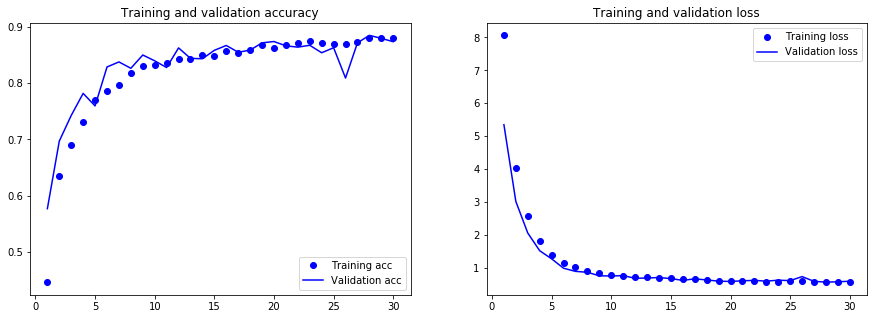

In [0]:
model_fname = 'fulldata_model33.h5'
hist_fname = 'fulldata_hist33'
model.save(str(Path(savepath,model_fname)))
savepickle(history, Path(savepath,hist_fname))

plot_model(history)


First: Train Acc: 0.445 Val Acc: 0.577
Half : Train Acc: 0.858 Val Acc: 0.867 Epochs: 15
Final: Train Acc: 0.881 Val Acc: 0.874 Epochs: 30


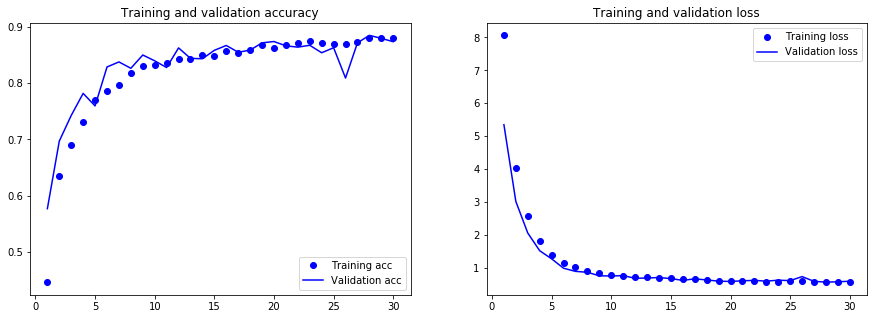

In [0]:
# Used to compare previous and current model before saving
plot_model(history)

Scratch work for model dev
1.   Model10: LR=.002
2.   Model11:LR=.003
3.   Model12:LR=.0009
4.   Model13:LR=.0008
5.   Model14:LR=.0007
6.   Model15:LR=0.008, Reg=.002
7.   Model16:LR=0.008, Reg=.0009
8.   Model17: LR=0.008, Reg=.0009, Fulldata
9.   Model18: LR=0.008, Reg=.0009, Fulldata, doubled all filters, dense node, and maxpool values



In [0]:
model27 = load_model(str(Path(savepath,'fulldata_model27.h5')))
model33 = load_model(str(Path(savepath,'fulldata_model33.h5')))

In [12]:
savepath = '/content/gdrive/My Drive/IDS594 Project'
model33 = load_model(str(Path(savepath,'fulldata_model33.h5')))

W0821 22:05:14.650328 140669274593152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 22:05:14.660334 140669274593152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0821 22:05:14.681694 140669274593152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0821 22:05:14.683992 140669274593152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 22:05:14.685505 140669274593152 deprecation_wrappe

In [0]:
mod=model33

In [0]:
# For normal model dev

test_labels = validation_generator.labels
test_images = np.array([image.imread(fpath) for fpath in validation_generator.filepaths])
predictions = mod.predict_generator(validation_generator, steps=validation_steps)
pred_labels = np.argmax(predictions, axis = 1)

In [0]:
# For final model

test_labels = test_generator.labels
test_images = np.array([image.imread(fpath) for fpath in test_generator.filepaths])
predictions = mod.predict_generator(test_generator, steps=validation_steps)
pred_labels = np.argmax(predictions, axis = 1)

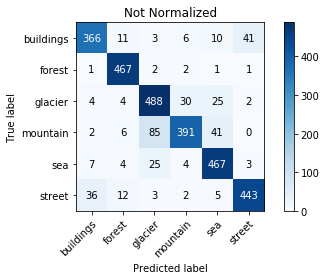

<Figure size 432x288 with 0 Axes>

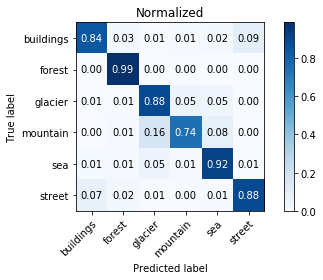

<Figure size 432x288 with 0 Axes>

In [0]:

plot_confusion_matrix(test_labels, pred_labels, classes=label_names, title='Not Normalized')
plot_confusion_matrix(test_labels, pred_labels, classes=label_names, normalize=True, title='Normalized')


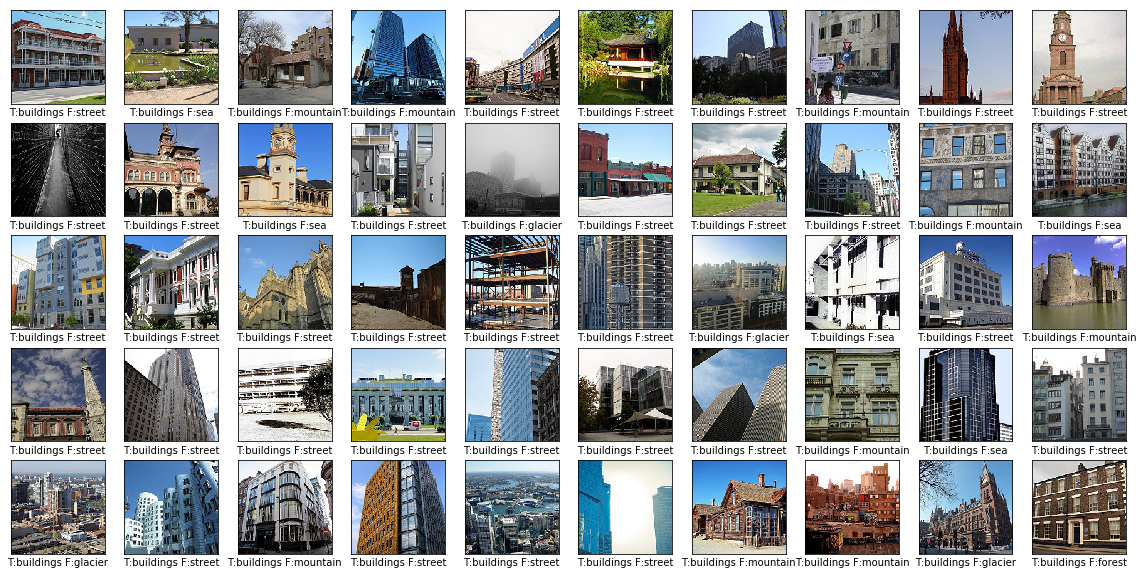

In [0]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 50 examples of mislabeled images
    """
    mislabeled = (test_labels == pred_labels)
    mislabeled_indices = np.flatnonzero(mislabeled == False)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    correct_labels = test_labels[mislabeled_indices]
    fig = plt.figure(figsize=(20,10))
    #fig.suptitle("Examples of mislabeled images:", fontsize=16)
    for i in range(50):
        plt.subplot(5,10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i])
        plt.xlabel('T:'+class_names[correct_labels[i]]+' F:'+class_names[mislabeled_labels[i]])
    plt.show()

print_mislabeled_images(label_names, test_images, test_labels, pred_labels)